# Wine Predication 

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


In [149]:
wine = pd.read_csv('wine.csv')
wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


### EDA 

In [3]:
countries = wine.groupby('country')['Unnamed: 0'].count()
points = wine.groupby('points')['Unnamed: 0'].count()
variety = wine.groupby('variety')['Unnamed: 0'].count()

In [4]:
top100 = wine[wine['points'] == 100].groupby('province')['Unnamed: 0'].count()
top100price = wine[wine['points'] == 100].groupby('price')['Unnamed: 0'].count()
cali = wine[wine['points'] == 100][wine['province'] == 'California'].groupby('region_1')['Unnamed: 0'].count()
cali

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


region_1
Napa Valley             2
Russian River Valley    2
Rutherford              2
Stags Leap District     1
Name: Unnamed: 0, dtype: int64

In [32]:
from matplotlib import cm

a=np.random.random(6)
cs=cm.Set1(np.arange(6)/6.)

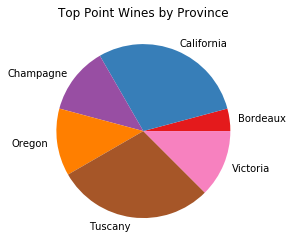

In [33]:
y = top100.values
mylabels = top100.index

colors = ['lightgreen', 'lightpink', 'lightblue', 'yellow', 'grey', 'yellow']


plt.pie(y, labels = mylabels, colors = cs)
plt.title('Top Point Wines by Province')
plt.show() 

The above pie chart, shows where the top wines are from. Most of them come from Italy and California. 

In [43]:
n=np.random.random(4)
ms=cm.Set1(np.arange(4)/4.)

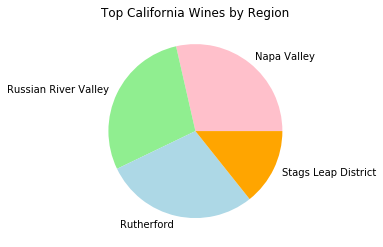

In [45]:
y = cali.values
mylabels = cali.index
colors = ['pink', 'lightgreen', 'lightblue', 'orange']
plt.pie(y, labels = mylabels, colors = colors)
plt.title('Top California Wines by Region')
plt.show() 

The above pie chart, shows where the top wines in California are from. 

Text(0.5, 0.98, 'Prices by Points given of the Wine')

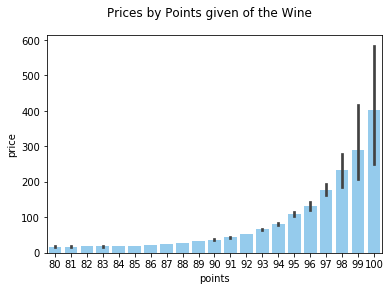

In [67]:
ax = sns.barplot(x=wine['points'], y=wine['price'], color='lightskyblue')
plt.suptitle('Prices by Points given of the Wine')

In [49]:
avg_country = wine.groupby('country').mean().drop(['Unnamed: 0'], axis = 1)
avg_country['dollar per point'] = avg_country['price'] / avg_country['points']

In [50]:
avg_country.sort_values(by=['dollar per point'], ascending = False).dropna().head(5)

,points,price,dollar per point
country,,,
US-France,88.000000,50.000000,0.568182
France,88.925870,45.619885,0.513010
England,92.888889,47.500000,0.511364
Hungary,87.329004,44.204348,0.506182
Luxembourg,87.000000,40.666667,0.467433


Based off of the average price of wine in a country, Lituania is the top for points per dollar on bottles of wine with 8.42. Listed above are the top 5. 

In [100]:
wine['variety'].nunique()

632

There are 632 different varieties of wines. 

In [54]:
wine.groupby('variety').mean().sort_values(['price'], ascending = False).dropna().drop(['Unnamed: 0'], axis = 1)

,points,price
variety,,
Cabernet-Shiraz,96.000000,150.000000
Muscadel,92.900000,141.300000
Mazuelo,88.000000,98.500000
Tinto Fino,89.906667,83.120000
Mission,90.571429,82.571429
...,...,...
Viura-Chardonnay,84.090909,8.727273
Carineña,83.000000,8.000000
Cabernet Sauvignon and Tinta Roriz,86.000000,8.000000


In [60]:
wine['variety'].nunique()

632

In [73]:
#distribtion of points, price.. number columns 

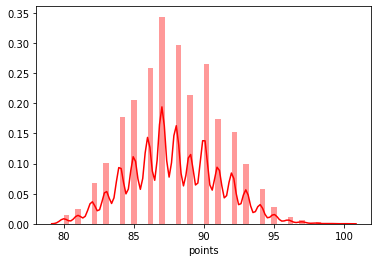

In [79]:
sns.distplot(wine['points'], color = 'red');

In [80]:
#Roughly normal distribution of points. 

## Modeling 

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer

### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [63]:
wine_tree = wine.dropna()

In [64]:
y = wine_tree["points"]
X = wine_tree[['price']]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

### Random Forest Regression 
Since I want to calculate several disucssion trees (suprevised) I chose Random Forest.  

In [98]:
# First do the regression just with price and points 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [103]:
x = wine_tree.price.values.reshape(-1, 1)
y = wine_tree.points.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [104]:
rm = RandomForestRegressor()
rm.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [105]:
prediction = rm.predict(x_test)

In [109]:
#Mean Square Error 
mse = mean_squared_error(prediction, y_test)
rmse = np.sqrt(mse)
rmse

2.9237025248420365

In [110]:
# Since the rsme is small, this means that by just using the price to predict the points t
#The regression did a pretty good job predicting the points the wine would recieve on the test. 

In [120]:
from sklearn.preprocessing import LabelBinarizer
test = pd.get_dummies(wine.country, prefix='Country')
test.head()

,Country_Albania,Country_Argentina,Country_Australia,Country_Austria,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,Country_China,...,Country_South Africa,Country_South Korea,Country_Spain,Country_Switzerland,Country_Tunisia,Country_Turkey,Country_US,Country_US-France,Country_Ukraine,Country_Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
countries = wine.country.fillna('None')

In [153]:
x_new = LabelBinarizer().fit_transform(countries)
x_new

150930

In [154]:
y_new = wine.price.fillna(0)
y_new

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.30, random_state=42)

In [158]:
rm = RandomForestRegressor()
rm.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [159]:
pre = rm.predict(x_test)

In [162]:
#Mean Square Error 
mse = mean_squared_error(pre, y_test)
rmse = np.sqrt(mse)
rmse

33.34006502952239

In [166]:
#Try the winery 

In [168]:
x_new = LabelBinarizer().fit_transform(wine.winery.fillna('None'))


In [169]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.30, random_state=42)

In [ ]:
rm = RandomForestRegressor()
rm.fit(x_train, y_train)

In [ ]:
pre = rm.predict(x_test)

In [ ]:
#Mean Square Error 
mse = mean_squared_error(pre, y_test)
rmse = np.sqrt(mse)
rmse

### WordClouds of description 

In [81]:
# word clouds of all the descriptions

In [84]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [91]:
str1 = ' '
descriptions = wine['description'].values
text = str1.join(descriptions)

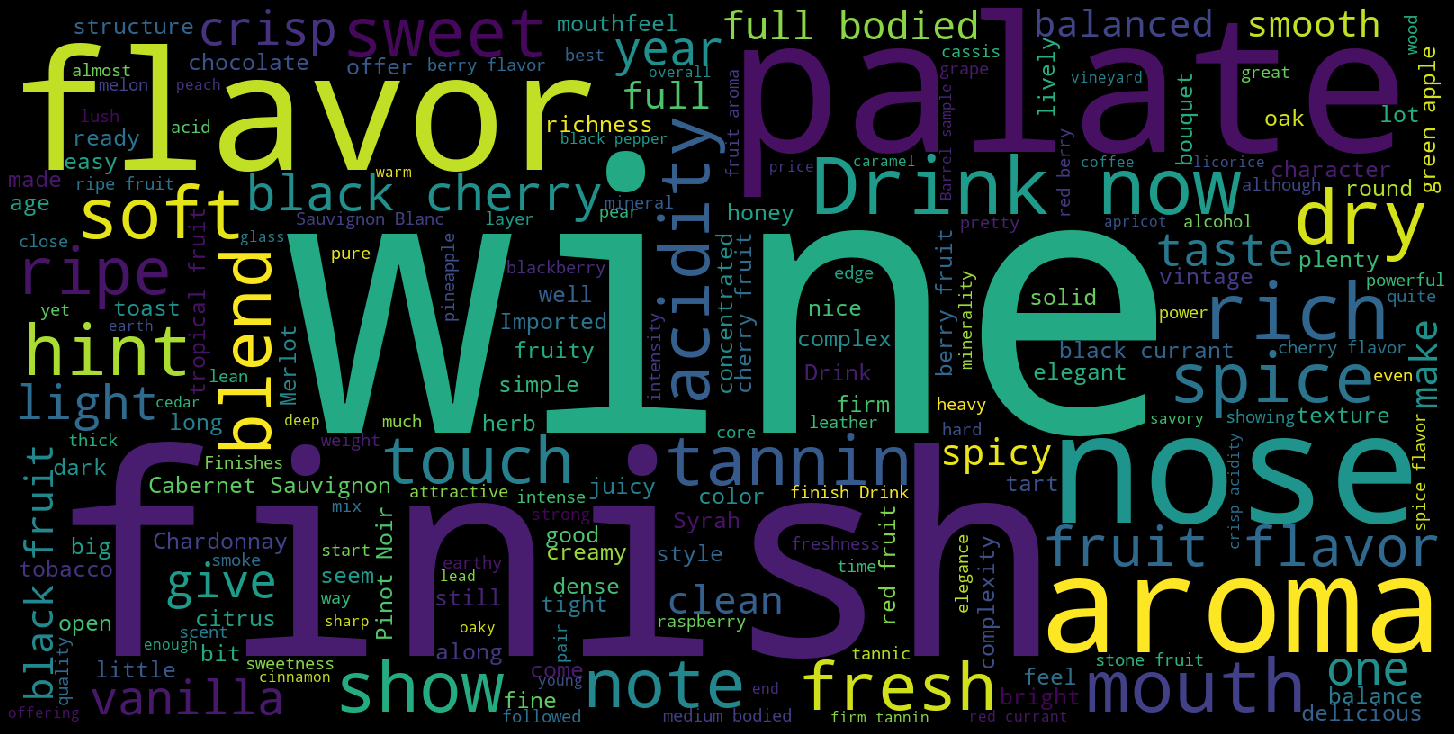

In [94]:
# Create and generate:
wordcloud = WordCloud(width=1600, height=800).generate(text)

# Display:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()